<a href="https://colab.research.google.com/github/MaximilianoScarlato/PROYECTO_4-_REDES/blob/feature%2Feda-redes-v4/proyecto_4_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Por favor, sube tu archivo Excel:


Saving REDES 2014.xls to REDES 2014 (2).xls
⏳ Cargando archivo...

✅ Columnas vacías eliminadas

🔄 Columnas renombradas:
['region', 'distrito', 'localidad', 'punto_muestreo', 'domicilio_extracción', 'sitio_extrac', 'macrocuenca', 'microcuenca', 'entidad', 'causa_extraccion', 'proyecto', 'fecha_muestreo', 'fecha_de_pasaje_a_estadisticos', 'número_de_muestra', 'mes', 'descripción_tipo_de_industria', '', 'arsénico_µg/l', '', 'arsénico_total_µg/l', '', 'nitratos_no3__mg/l', '', 'tetracloruro_de_carbono_µg/l', '', 'tricloroetileno_µg/l']

🗑️ Columnas eliminadas: ['sitio_extrac', 'macrocuenca', 'microcuenca', 'proyecto', '', 'arsénico_µg/l']

🎉 Estado FINAL del DataFrame con nuevo formato:
• Filas: 2970 | Columnas: 20
• Muestra de datos (primeras 2 filas):
            region            distrito localidad punto_muestreo domicilio_extracción entidad causa_extraccion       fecha_muestreo fecha_de_pasaje_a_estadisticos número_de_muestra             mes descripción_tipo_de_industria criterio  ars

<ipython-input-4-9ef7ffbaa0a0>:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['rango', 'region']).size().unstack(fill_value=0)


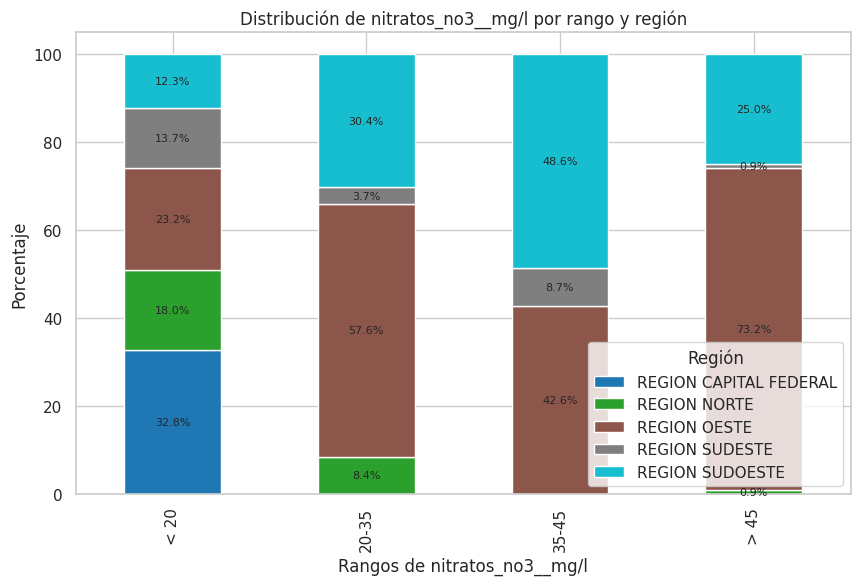


📊 Gráfico de barras apiladas para arsénico_total_µg/l


<ipython-input-4-9ef7ffbaa0a0>:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['rango', 'region']).size().unstack(fill_value=0)


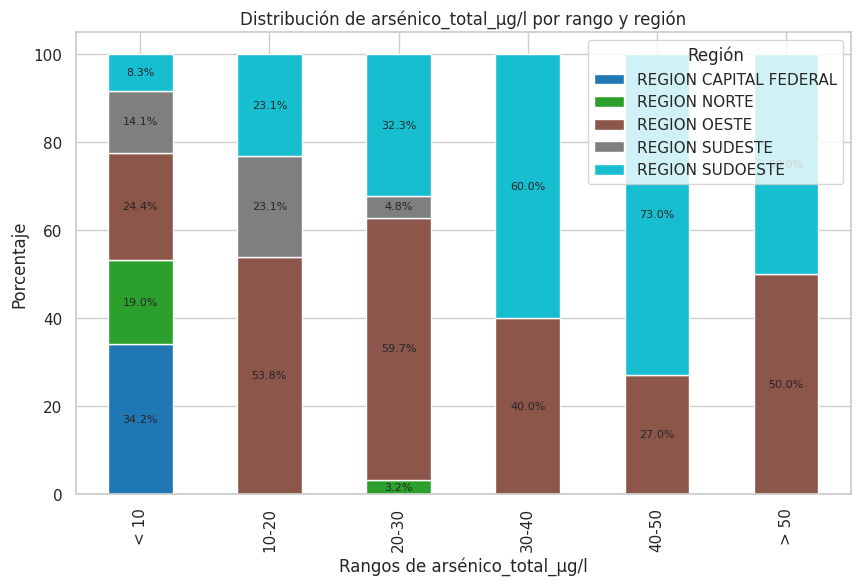


📊 Gráfico de barras apiladas para tricloroetileno_µg/l


<ipython-input-4-9ef7ffbaa0a0>:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['rango', 'region']).size().unstack(fill_value=0)


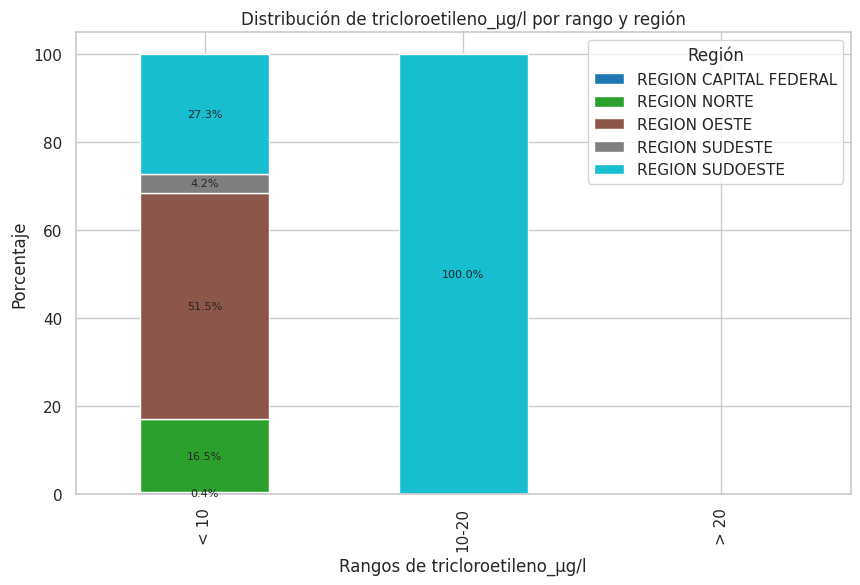


📊 Gráfico de barras apiladas para tetracloruro_de_carbono_µg/l


<ipython-input-4-9ef7ffbaa0a0>:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['rango', 'region']).size().unstack(fill_value=0)


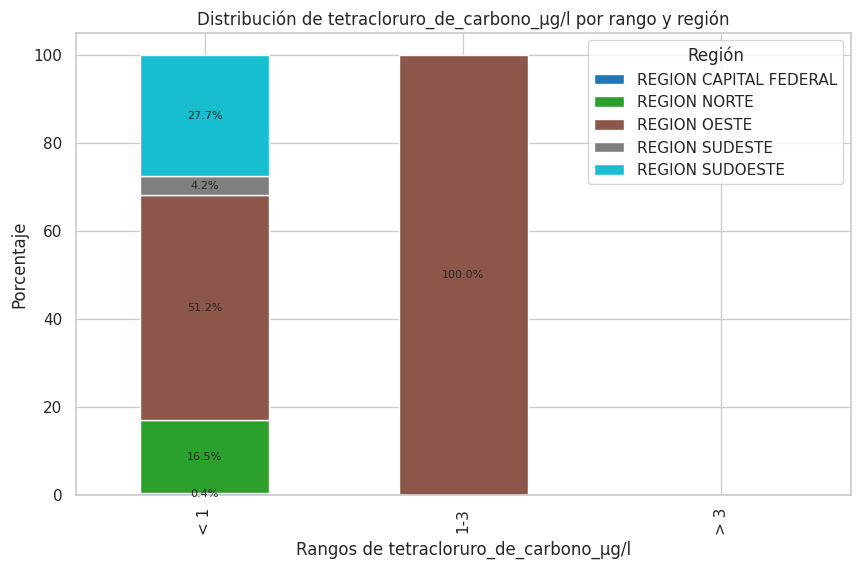


📊 Histograma de cantidad de muestras por región


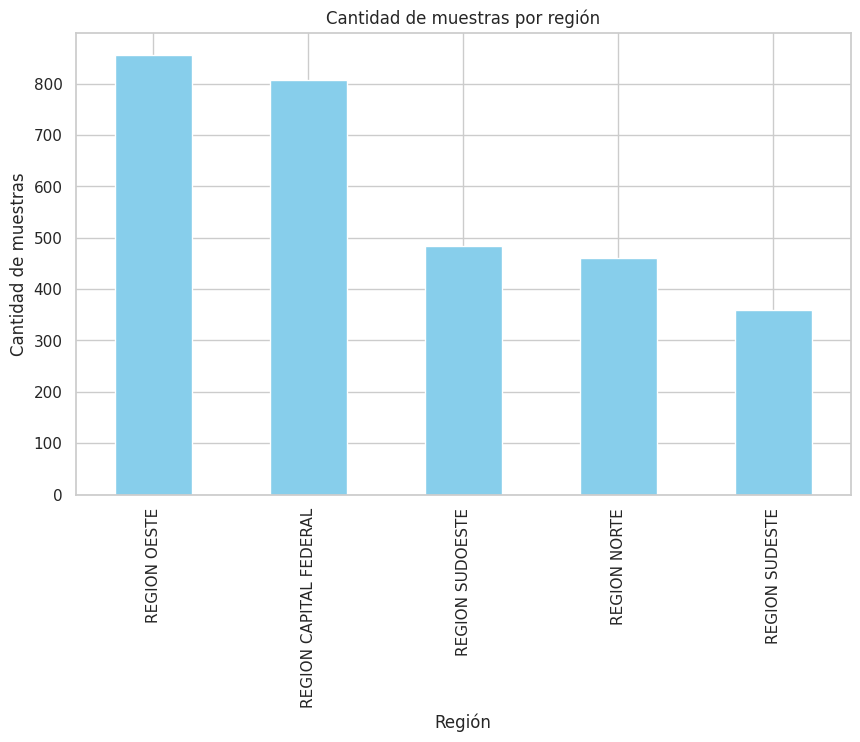


📊 Valores fuera de norma

nitratos_no3__mg/l: 110 muestras fuera de norma (>45)


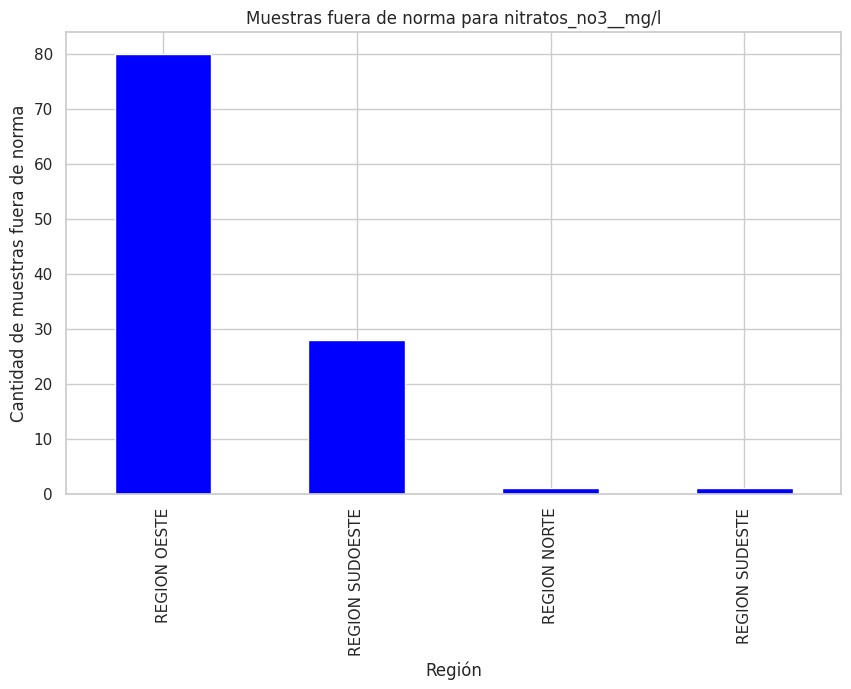


arsénico_total_µg/l: 1 muestras fuera de norma (>50)


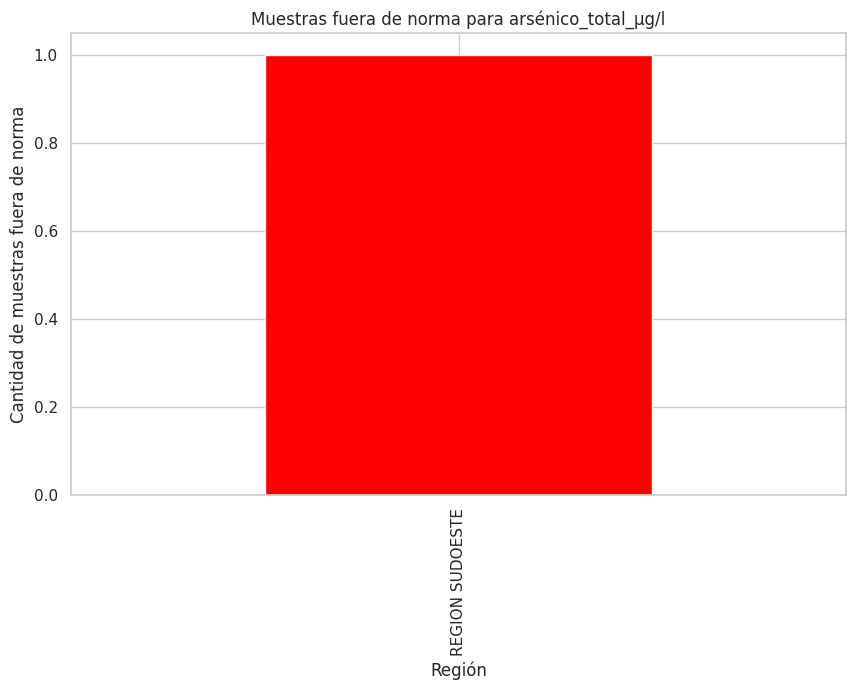


tricloroetileno_µg/l: 0 muestras fuera de norma (>20)

tetracloruro_de_carbono_µg/l: 0 muestras fuera de norma (>3)

🎉 ¡Análisis completado con éxito!


In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Configuración inicial
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ---------------------------------------------------------------------------
# 1. Carga y limpieza inicial de datos
# ---------------------------------------------------------------------------
def cargar_y_limpiar_datos(ruta_archivo):
    """
    Carga el archivo Excel y realiza limpieza inicial:
    - Elimina filas/columnas vacías
    - Normaliza nombres de columnas
    - Maneja valores faltantes
    - Convierte tipos de datos
    - Reestructura el formato de salida según lo solicitado
    """
    print("⏳ Cargando archivo...")
    df = pd.read_excel(ruta_archivo, header=None)

    # Eliminar la primera fila (vacía)
    df = df.iloc[1:, :].reset_index(drop=True)

    # Combinar las filas 2 y 3 para crear encabezados
    headers_row_2 = df.iloc[0, :].fillna("")  # Fila 2
    headers_row_3 = df.iloc[1, :].fillna("")  # Fila 3
    combined_headers = headers_row_2 + " " + headers_row_3
    combined_headers = combined_headers.str.strip().str.replace(" +", " ", regex=True)  # Limpiar espacios

    # Asignar los encabezados combinados
    df.columns = combined_headers
    df = df.iloc[2:, :].reset_index(drop=True)  # Eliminar las filas 2 y 3

    # Eliminar columnas completamente vacías
    df = df.dropna(axis=1, how='all')
    print("\n✅ Columnas vacías eliminadas")

    # Renombrar columnas
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_').str.replace('unnamed', 'columna_sin_nombre')
    print("\n🔄 Columnas renombradas:")
    print(df.columns.tolist())

    # -----------------------------------------------------------------------
    # Eliminación de columnas específicas (por nombre para mayor seguridad)
    # -----------------------------------------------------------------------
    columnas_a_eliminar = ['sitio_extrac', 'macrocuenca', 'microcuenca', 'proyecto', '', 'arsénico_µg/l']
    columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df.columns]

    df = df.drop(columns=columnas_a_eliminar, errors='ignore')
    print("\n🗑️ Columnas eliminadas:", columnas_a_eliminar)

    # -----------------------------------------------------------------------
    # Procesamiento específico para el formato solicitado
    # -----------------------------------------------------------------------
    # Columnas de información general que se mantendrán
    info_cols = ['region', 'distrito', 'localidad', 'punto_muestreo', 'domicilio_extracción',
                'entidad', 'causa_extraccion', 'fecha_muestreo', 'fecha_de_pasaje_a_estadisticos',
                'número_de_muestra', 'mes', 'descripción_tipo_de_industria']

    # Columnas objetivo para el nuevo formato
    target_cols = ['arsénico_total_µg/l', 'nitratos_no3__mg/l',
                 'tetracloruro_de_carbono_µg/l', 'tricloroetileno_µg/l']

    # Verificar que existan las columnas necesarias
    info_cols = [col for col in info_cols if col in df.columns]
    target_cols = [col for col in target_cols if col in df.columns]

    # Crear un nuevo DataFrame con las columnas de información
    new_df = df[info_cols].copy()

    # Procesar cada columna objetivo para extraer criterio y valor
    for col in target_cols:
        # Extraer criterio (primer caracter)
        new_df[f'criterio_{col}'] = df[col].astype(str).str[0].replace({'n': '<', 'N': '<', ',': '<', '.': '<'})

        # Extraer valor numérico
        new_df[col] = df[col].astype(str).str[1:].str.replace(',', '.').str.strip()

        # Manejar casos especiales donde el valor completo es numérico
        mask = ~new_df[f'criterio_{col}'].isin(['<', '='])
        new_df.loc[mask, col] = df.loc[mask, col].astype(str).str.replace(',', '.').str.strip()
        new_df.loc[mask, f'criterio_{col}'] = '='

        # Manejar casos donde el símbolo está después del número (ej: "5=")
        mixed_mask = df[col].astype(str).str.contains(r'^\d+[<=]', na=False)
        new_df.loc[mixed_mask, f'criterio_{col}'] = df.loc[mixed_mask, col].astype(str).str.extract(r'(\D)$')[0]
        new_df.loc[mixed_mask, col] = df.loc[mixed_mask, col].astype(str).str.extract(r'^(\d+)')[0]

        # Convertir a numérico
        new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

    # Reordenar columnas según el formato solicitado
    ordered_cols = info_cols.copy()
    for col in target_cols:
        ordered_cols.append(f'criterio_{col}')
        ordered_cols.append(col)

    new_df = new_df[ordered_cols]

    # Renombrar columnas de criterio para que sean todas iguales
    for col in new_df.columns:
        if col.startswith('criterio_'):
            new_df = new_df.rename(columns={col: 'criterio'})

    # Reemplazar NaN en criterio con '<'
    new_df['criterio'] = new_df['criterio'].fillna('<')

    print("\n🎉 Estado FINAL del DataFrame con nuevo formato:")
    print(f"• Filas: {len(new_df)} | Columnas: {len(new_df.columns)}")
    print(f"• Muestra de datos (primeras 2 filas):")
    print(new_df.head(2).to_string())

    # Guardar archivo limpio temporal
    new_df.to_csv("datos_limpios_preview.csv", index=False)
    print("\n📁 Archivo temporal guardado: 'datos_limpios_preview.csv'")

    return new_df

# ---------------------------------------------------------------------------
# 2. Exportar datos limpios
# ---------------------------------------------------------------------------
def exportar_datos(df):
    """
    Exporta el DataFrame limpio a formatos XLSX y CSV.
    """
    try:
        output_xlsx_path = "archivo_limpio.xlsx"  # Ruta para el archivo .xlsx
        output_csv_path = "archivo_limpio.csv"  # Ruta para el archivo .csv

        # Guardar en formato Excel (.xlsx)
        df.to_excel(output_xlsx_path, index=False, engine="openpyxl")
        print(f"\n📁 Archivo limpio guardado en formato XLSX: {output_xlsx_path}")

        # Guardar en formato CSV
        df.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
        print(f"📁 Archivo limpio guardado en formato CSV: {output_csv_path}")

    except Exception as e:
        print(f"❌ Error al exportar los datos: {e}")

# ---------------------------------------------------------------------------
# 3. Análisis Exploratorio de Datos (EDA)
# ---------------------------------------------------------------------------
def realizar_eda(df):
    """
    Realiza análisis exploratorio de datos:
    """
    print("\n" + "="*80)
    print("ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
    print("="*80 + "\n")

    # Filtrar solo columnas numéricas para el análisis
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    print("📊 Información básica del dataset:")
    print(f"Total de registros: {len(df)}")
    print(f"Total de columnas: {len(df.columns)}")
    print("\nColumnas disponibles:")
    print(df.columns.tolist())

    print("\n📈 Estadísticas descriptivas para columnas numéricas:")
    print(df[numeric_cols].describe().transpose())

    print("\n🔍 Valores faltantes por columna:")
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    missing_df = pd.concat([missing_data, missing_percent], axis=1, keys=['Total', 'Porcentaje'])
    print(missing_df[missing_df['Total'] > 0])

# ---------------------------------------------------------------------------
# 4. Visualización de datos
# ---------------------------------------------------------------------------
def visualizar_datos(df):
    """
    Crea visualizaciones para explorar los datos:
    - Gráficos de barras apiladas para cada parámetro
    - Histogramas de cantidad de muestras por región
    - Análisis de valores fuera de norma
    """
    print("\n" + "="*80)
    print("VISUALIZACIÓN DE DATOS")
    print("="*80 + "\n")

    # Eliminar filas con "NO DETERMINADA" en las columnas 'region' y 'distrito'
    df = df[~df['region'].str.contains("NO DETERMINADA", na=False)]
    df = df[~df['distrito'].str.contains("NO DETERMINADA", na=False)]

    # Parámetros y límites regulatorios
    parametros = {
        'nitratos_no3__mg/l': {'rangos': [0, 20, 35, 45, np.inf], 'etiquetas': ['< 20', '20-35', '35-45', '> 45'], 'limite': 45},
        'arsénico_total_µg/l': {'rangos': [0, 10, 20, 30, 40, 50, np.inf], 'etiquetas': ['< 10', '10-20', '20-30', '30-40', '40-50', '> 50'], 'limite': 50},
        'tricloroetileno_µg/l': {'rangos': [0, 10, 20, np.inf], 'etiquetas': ['< 10', '10-20', '> 20'], 'limite': 20},
        'tetracloruro_de_carbono_µg/l': {'rangos': [0, 1, 3, np.inf], 'etiquetas': ['< 1', '1-3', '> 3'], 'limite': 3}
    }

    # Gráficos de barras apiladas por parámetro
    for parametro, config in parametros.items():
        if parametro in df.columns:
            print(f"\n📊 Gráfico de barras apiladas para {parametro}")
            df['rango'] = pd.cut(df[parametro], bins=config['rangos'], labels=config['etiquetas'], right=False)
            tabla = df.groupby(['rango', 'region']).size().unstack(fill_value=0)
            tabla_percent = tabla.div(tabla.sum(axis=1), axis=0) * 100

            # Gráfico de barras apiladas
            ax = tabla_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
            plt.title(f"Distribución de {parametro} por rango y región")
            plt.xlabel(f"Rangos de {parametro}")
            plt.ylabel("Porcentaje")
            plt.legend(title="Región")

            # Añadir porcentajes dentro de las barras
            for i, barra in enumerate(ax.patches):
                x = barra.get_x() + barra.get_width() / 2
                y = barra.get_y() + barra.get_height() / 2
                if barra.get_height() > 0:  # Solo mostrar si el porcentaje es mayor a 0
                    ax.text(x, y, f"{barra.get_height():.1f}%", ha='center', va='center', fontsize=8)

            plt.show()

    # Histograma de cantidad de muestras por región
    if 'region' in df.columns:
        print("\n📊 Histograma de cantidad de muestras por región")
        region_counts = df['region'].value_counts()
        region_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
        plt.title("Cantidad de muestras por región")
        plt.xlabel("Región")
        plt.ylabel("Cantidad de muestras")
        plt.show()

    # Valores fuera de norma
    print("\n📊 Valores fuera de norma")
    for parametro, config in parametros.items():
        if parametro in df.columns:
            fuera_de_norma = df[df[parametro] > config['limite']]
            print(f"\n{parametro}: {len(fuera_de_norma)} muestras fuera de norma (>{config['limite']})")
            if not fuera_de_norma.empty:
                # Reducir tamaño de la barra roja para arsénico
                color = 'red' if parametro == 'arsénico_total_µg/l' else 'blue'
                fuera_de_norma['region'].value_counts().plot(kind='bar', color=color, figsize=(10, 6))
                plt.title(f"Muestras fuera de norma para {parametro}")
                plt.xlabel("Región")
                plt.ylabel("Cantidad de muestras fuera de norma")
                plt.show()

# ---------------------------------------------------------------------------
# 5. Función principal
# ---------------------------------------------------------------------------
def main():
    """
    Función principal que ejecuta el flujo completo:
    1. Carga y limpieza de datos
    2. Exportación de datos limpios
    3. Análisis exploratorio
    4. Visualización de datos
    """
    from google.colab import files

    # Subir archivo
    print("📂 Por favor, sube tu archivo Excel:")
    uploaded = files.upload()
    ruta_archivo = list(uploaded.keys())[0]

    # 1. Cargar y limpiar datos
    df = cargar_y_limpiar_datos(ruta_archivo)

    # 2. Exportar datos limpios
    exportar_datos(df)

    # 3. Análisis exploratorio
    realizar_eda(df)

    # 4. Visualización de datos
    visualizar_datos(df)

    print("\n🎉 ¡Análisis completado con éxito!")

# Ejecutar función principal
if __name__ == "__main__":
    main()